In [80]:
from pathlib import Path
import pandas as pd
import numpy as np
from numpy import linalg as la
import sys
import matplotlib.pyplot as plt
import seaborn as sas
import sklearn.preprocessing as pre
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [81]:
data_folder = Path("dataset/experiment-ii/S1/Air_Mat/")

file_name = data_folder / "Matrix_Air_B1.txt"
df = pd.read_csv(file_name, sep=" ", header=None)
#df = pd.read_csv(file_name, sep="\t", header=None)
#la stessa posizione viene misurata 82 volte DC
#df.drop(columns=[2048], inplace = True) #tolgo colonna
#df.drop(0, inplace = True) #tolgo riga
#df.drop(1, inplace = True) #tolgo riga
#df.drop(2, inplace = True) #tolgo riga

df

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,44,44,50,47,47,49,47,47,48,50,...,43,44,41,44,47,44,44,43,42,44
1,46,41,48,52,58,62,57,54,60,58,...,42,44,44,43,43,45,43,45,44,42
2,44,44,50,47,52,61,55,55,69,64,...,43,46,41,43,44,43,43,43,44,46
3,44,50,48,46,49,55,59,50,131,103,...,44,43,46,42,43,43,42,44,42,43
4,52,65,75,73,79,386,487,102,603,393,...,45,44,47,43,44,45,44,45,46,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,208,223,177,177,218,245,268,230,198,166,...,49,51,46,46,45,42,45,49,46,52
60,123,122,112,108,125,129,152,143,120,95,...,51,45,49,45,45,44,44,42,46,61
61,62,76,79,76,74,81,89,86,72,65,...,48,44,47,46,44,44,41,44,50,52
62,108,141,122,135,132,146,139,132,108,87,...,68,48,50,48,47,44,44,45,47,52


In [82]:
array = df.to_numpy()
#avg = array.mean()
avg = np.mean(array, axis = 1, keepdims=True)

print(avg.shape)
array = array - avg

CX = np.cov(array)
w,v = la.eig(CX) 

CY =  np.diag(np.round(np.real(w),2))
print("Trace of the original data matrix: " , np.round(CX.trace(),2))
print("Trace of the data matrix after the changes of base: ", np.round(CY.trace(),2), "\n")

tr = 0;
for i in range(0,len(CY)):
    tr = tr + CY[i,i]
    print("Fraction of the total variability keeping only the first principal component: ", np.round(100*tr/CY.trace()),"%")


P = v[:,0:1]
print(P.shape)
P = abs(P)

array_final = P.T.dot(array)

(64, 1)
Trace of the original data matrix:  227927.56
Trace of the data matrix after the changes of base:  227927.59 

Fraction of the total variability keeping only the first principal component:  71.0 %
Fraction of the total variability keeping only the first principal component:  87.0 %
Fraction of the total variability keeping only the first principal component:  91.0 %
Fraction of the total variability keeping only the first principal component:  94.0 %
Fraction of the total variability keeping only the first principal component:  96.0 %
Fraction of the total variability keeping only the first principal component:  97.0 %
Fraction of the total variability keeping only the first principal component:  98.0 %
Fraction of the total variability keeping only the first principal component:  99.0 %
Fraction of the total variability keeping only the first principal component:  99.0 %
Fraction of the total variability keeping only the first principal component:  100.0 %
Fraction of the tota

In [83]:
array_final[0] = array_final[0]
array_final[0][array_final[0] < 0] = 0
array_final[0][array_final[0] > 3000] = 1000

OldRange = array_final[0].max()  
NewRange = 1000 
for i in range(0,len(array_final[0])):
    array_final[0][i] = (((array_final[0][i]) * NewRange) / OldRange) 

file = open("prova1.txt", "w") 

for i in range(0,len(array_final[0])):
    l = i + 1;
    if(l%32 != 0):
        file.write(str(int(array_final[0][i])) + "\t") 
    else:
        file.write("\n") 
        
        
file.close() 

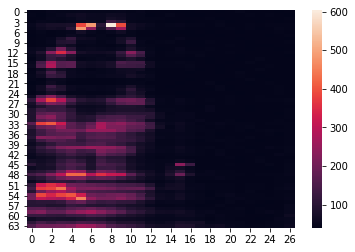

In [84]:
array = df.to_numpy()
sas.heatmap(array.reshape(64,27))

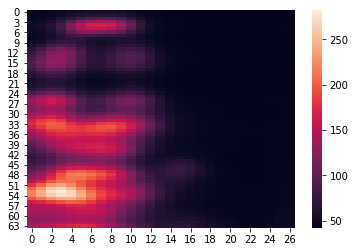

In [85]:
from scipy.ndimage import gaussian_filter

gauss = gaussian_filter(array, sigma=1.5)
#sas.heatmap(np.flip(gauss,0))
sas.heatmap(gauss.reshape(64,27))

In [86]:
tmp = array_final[0]

tmp = np.reshape(tmp,(64,32))

X = []

#build a vector for each point 
#every vector contains the coordinates and the intensity values of the shape of the body
for i in range(0, tmp.shape[0]):
    for j in range(0, tmp.shape[1]):
        t = []
        if tmp[i][j] == 0:
            continue
        else:
            t.append(i)
            t.append(j)
            t.append(tmp[i][j])
            X.append(t)

X = np.array(X)


ValueError: cannot reshape array of size 27 into shape (64,32)

In [87]:
import sklearn.preprocessing as pre
from sklearn.cluster import KMeans as km
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_std = scaler.fit_transform(X)

NameError: name 'X' is not defined

In [88]:
#center = [(6.5,15.5,500),(21.5,15.5,500),(38.,15.5,500),(55.,15.5,500)]
center = [(6.5,15.5,500),(21.5,15.5,500),(55.,15.5,500)]
center = np.array(center)
#km = km(n_clusters=4).fit(X_std)
km = km(n_clusters=3).fit(X_std)
km.labels_

y_km = km.predict(X_std)

o = km.cluster_centers_
print(o)
o = scaler.inverse_transform(o)
print(o)

NameError: name 'X_std' is not defined

In [58]:
sas.heatmap(array_final[0].reshape(64,32))
plt.scatter(o[:,1], o[:,0], 
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)



ValueError: cannot reshape array of size 27 into shape (64,32)

In [59]:
lol = [3 for i in range(64*32)]

for i in range(0,len(X)):
    index = int(X[i][0]*32) + int(X[i][1])
    lol[index] = km.labels_[i]

lol = np.array(lol)
sas.heatmap(lol.reshape(64,32))

print(X[0:4])

NameError: name 'X' is not defined

In [79]:
import sklearn.preprocessing as pre
from sklearn.cluster import KMeans as km
from sklearn.preprocessing import StandardScaler

tmp = array_final[0]
tmp = np.reshape(tmp,(64,32))

X = []

#build a vector for each point 
#every vector contains the coordinates and the intensity values
for i in range(0, tmp.shape[0]):
    for j in range(0, tmp.shape[1]):
        t = []
        t.append(i)
        t.append(j)
        X.append(t)

X = np.array(X)

center = [(0,0),(16,0),(37,0),(64,0)]
center = np.array(center)
#km = km(n_clusters=4).fit(X)
km = km(n_clusters=4, init = center).fit(X)
km.labels_

y_km = km.predict(X)

o = km.cluster_centers_
print(o)

sas.heatmap(array_final[0].reshape(64,32))
plt.scatter(o[:,1], o[:,0], 
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)


ValueError: cannot reshape array of size 27 into shape (64,32)

In [61]:
#data_folder = Path("dataset/experiment-ii/S1/Air_Mat/")

file_name = "dataset.csv"
df = pd.read_csv(file_name, sep=",", header=0)
df

,1 x 1,1 x 2,1 x 3,1 x 4,1 x 5,1 x 6,1 x 7,1 x 8,1 x 9,1 x 10,...,64 x 25,64 x 26,64 x 27,64 x 28,64 x 29,64 x 30,64 x 31,64 x 32,Subject,Position
0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.002341,0.000000,0.000000,0.000000,...,1.767449,0.000000,0.000000,0.000000,0.000000,0.167969,0.0,0.0,4,0
1,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.001719,0.000000,0.000000,0.000000,...,1.780317,0.000000,0.000000,0.000000,0.000000,0.170719,0.0,0.0,4,0
2,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.002265,0.000000,0.000000,0.000000,...,1.814451,0.000000,0.000000,0.000000,0.000000,0.161157,0.0,0.0,4,0
3,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.001076,0.000000,0.000000,0.000000,...,1.795900,0.000000,0.000000,0.000000,0.000000,0.159603,0.0,0.0,4,0
4,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.002759,0.000000,0.000000,0.000000,...,1.754924,0.000000,0.000000,0.000000,0.000000,0.169571,0.0,0.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,0.0,0.0,0.0,36.649215,37.521815,34.904014,37.521815,42.757417,39.267016,37.521815,...,95.113438,38.394415,39.267016,39.267016,37.521815,38.394415,0.0,0.0,8,0
2668,0.0,0.0,0.0,70.234114,75.250836,88.628763,81.939799,90.301003,88.628763,86.956522,...,98.662207,88.628763,75.250836,70.234114,71.906355,71.906355,0.0,0.0,8,0
2669,0.0,0.0,0.0,6.658212,6.182625,6.975269,8.084971,7.292327,6.975269,7.292327,...,7.609385,7.292327,8.243500,6.975269,6.816741,7.133798,0.0,0.0,8,0
2670,0.0,0.0,0.0,8.624148,8.824709,8.824709,9.426394,9.426394,9.025271,9.025271,...,10.028079,9.025271,8.824709,8.624148,9.225832,8.824709,0.0,0.0,8,0


In [62]:
df.min(axis = 1)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2667    0.0
2668    0.0
2669    0.0
2670    0.0
2671    0.0
Length: 2672, dtype: float64

[[  7.28947368   4.80263158 232.82894737]
 [  6.3013245   15.06291391  67.65231788]]


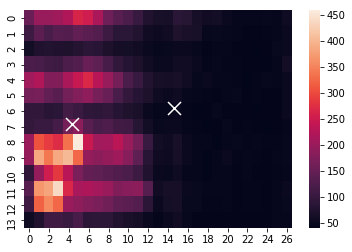

In [137]:
#define sections
total = np.flip(df.to_numpy(), 0)

import sklearn.preprocessing as pre
from sklearn.cluster import KMeans as km
from sklearn.preprocessing import StandardScaler

total = np.reshape(total,(64,27))
section1 = total[:14]

tmp = section1

X = []

#build a vector for each point 
#every vector contains the coordinates and the intensity values
for i in range(0, tmp.shape[0]):
    for j in range(0, tmp.shape[1]):
        t = []
        t.append(i)
        t.append(j)
        t.append(tmp[i][j])
        X.append(t)

X = np.array(X)

km = km(n_clusters=2).fit(X)
km.labels_

y_km = km.predict(X)

o = km.cluster_centers_
print(o)

sas.heatmap(section1.reshape(14,27))
plt.scatter(o[:,1], o[:,0], 
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)


0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
[[  0   0 155]
 [  0   1 200]
 [  0   2 200]]


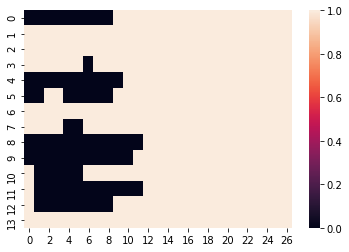

In [138]:
lol = [2 for i in range(14*27)]

for i in range(0,len(X)):
    index = int(X[i][0]*27) + int(X[i][1])
    lol[index] = km.labels_[i]
    print(km.labels_[i])

lol = np.array(lol)
sas.heatmap(lol.reshape(14,27))

print(X[0:3])

In [140]:
print(km.labels_)

[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1]


In [154]:
cluster_1 = []
cluster_2 = []

for i in range(0,len(X)):
    if km.labels_[i] == 0:
        cluster_1.append(X[i])
    else:
        cluster_2.append(X[i])
    


mean_1 = np.mean(cluster_1, axis = 0) 
mean_2 = np.mean(cluster_2, axis = 0) 

if mean_1[2] > mean_2[2]:
    mean_cluster = mean_1[2]
    x_pos = km.cluster_centers_[0][0]
    y_pos = km.cluster_centers_[0][1]
else:
    mean_cluster = mean_2[2]
    x_pos = km.cluster_centers_[1][0]
    y_pos = km.cluster_centers_[1][1]
    

138


In [156]:
print(km.cluster_centers_)

[[  7.28947368   4.80263158 232.82894737]
 [  6.3013245   15.06291391  67.65231788]]
